In [1]:
import os
import re
import librosa
import soundfile as sf
import numpy as np
from tqdm import tqdm
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [2]:
# 1. 음원 불러오기
audio_path = 'unwelcomeSchool.ogg'
audio_path = "unwelcomeSchool/drums.wav"
y, sr = librosa.load(audio_path, sr=None)

In [3]:
# 2. 특징 추출 및 시각화
plt.figure(figsize=(60, 12))

<Figure size 6000x1200 with 0 Axes>

<Figure size 6000x1200 with 0 Axes>

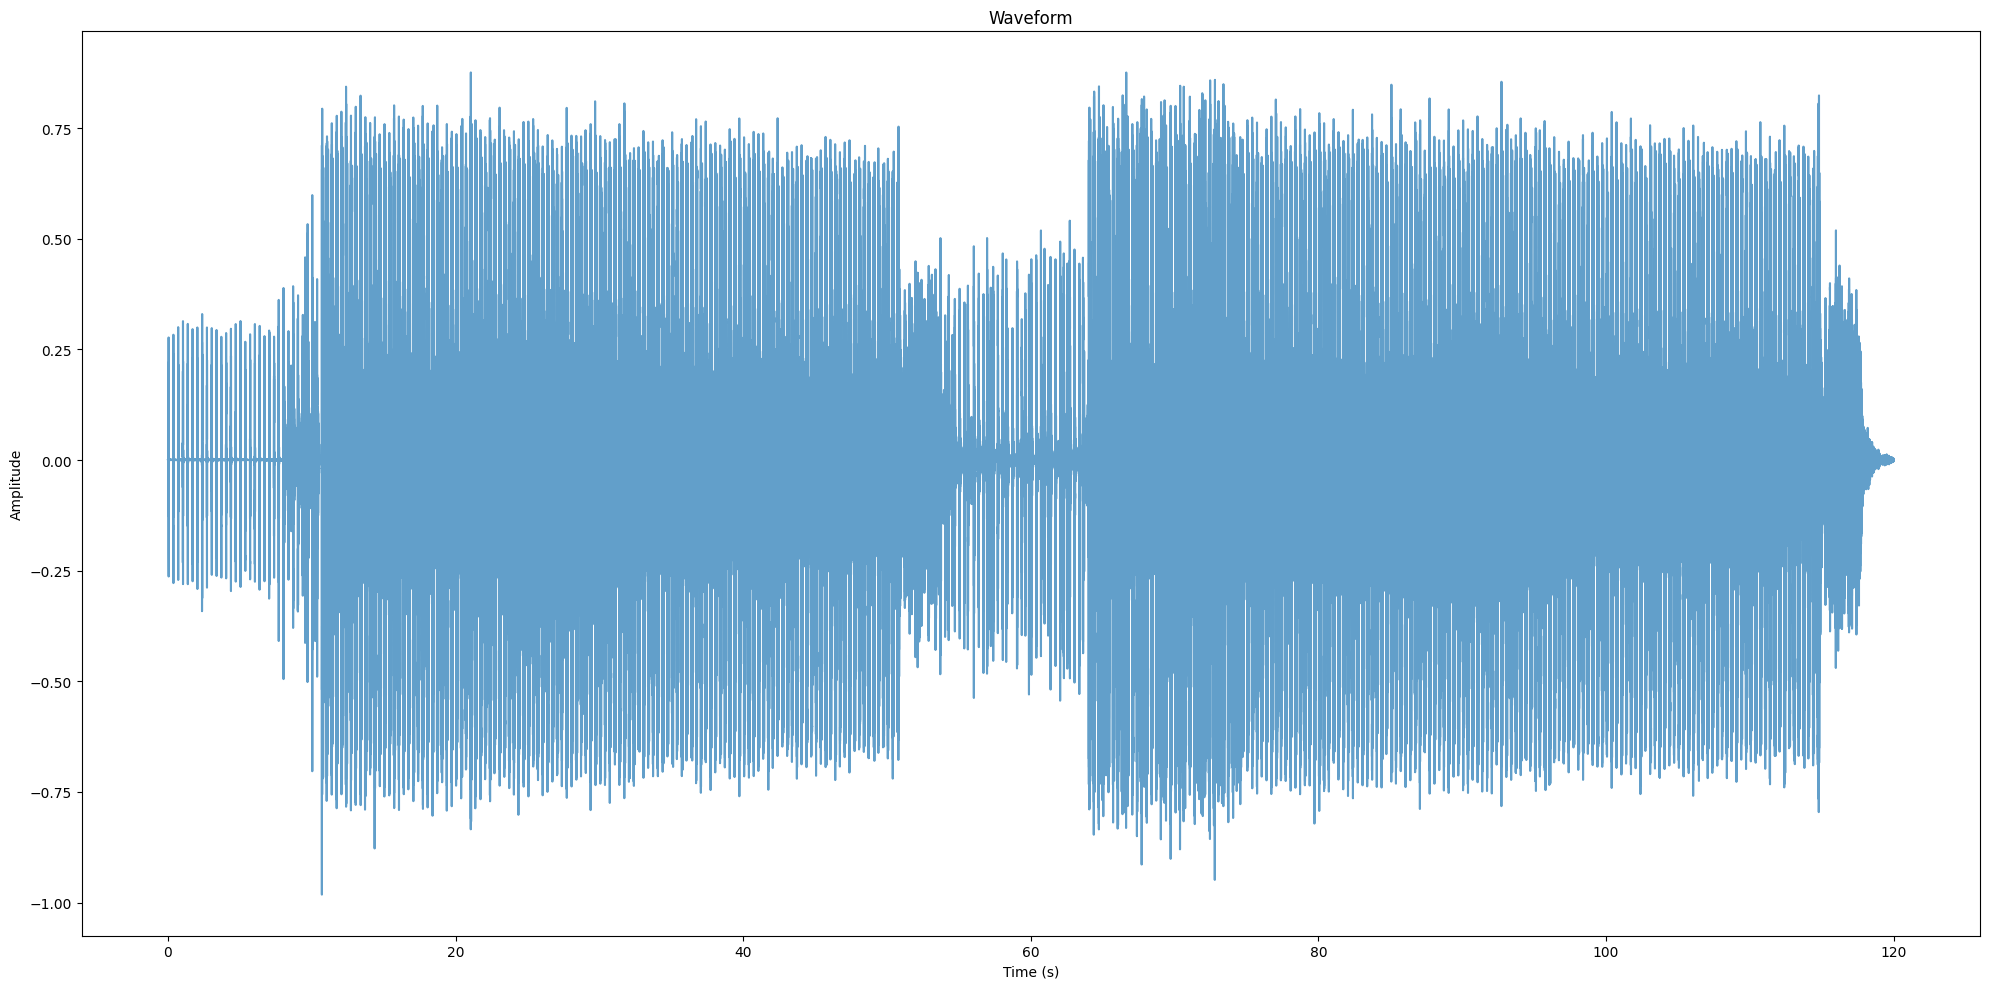

In [4]:
# 1) Waveform
times = np.linspace(0, len(y)/sr, num=len(y))
plt.figure(figsize=(20, 10))
plt.plot(times, y, alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Spectrogram (Log)')

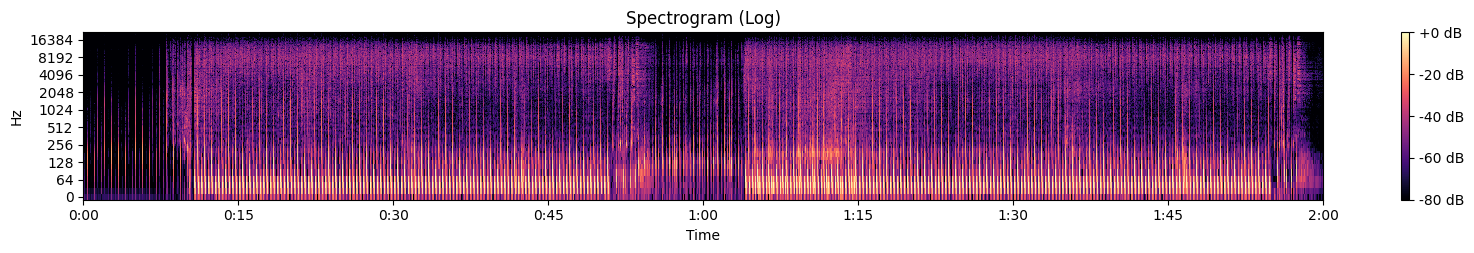

In [5]:
# 2) Spectrogram (STFT)
plt.figure(figsize=(20, 10))
plt.subplot(4, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log)')

In [6]:
print(D)

[[-76.471436 -71.11929  -80.       ... -68.66641  -67.30246  -72.29319 ]
 [-77.966125 -76.07521  -65.83344  ... -73.99466  -69.89056  -76.34599 ]
 [-80.       -80.       -68.098564 ... -67.90815  -70.459724 -77.79303 ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


In [15]:
D.shape

(1025, 10337)

Text(0.5, 1.0, 'Mel Spectrogram')

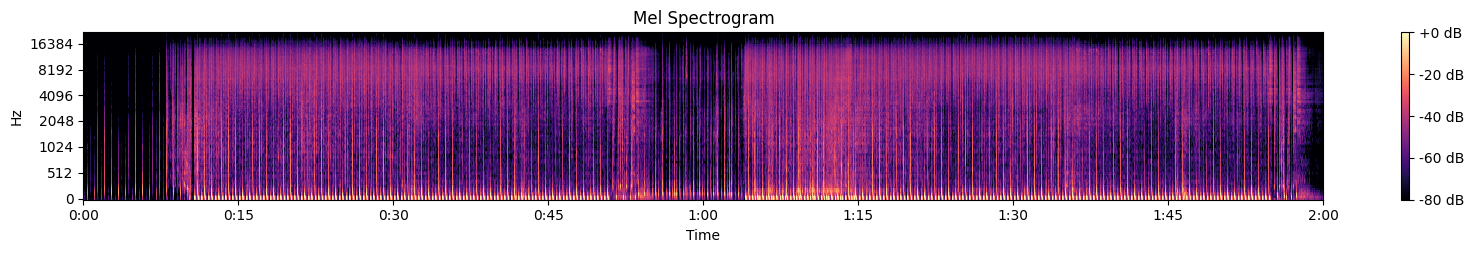

In [7]:
# Mel-spectrogram
plt.figure(figsize=(20, 10))
plt.subplot(4, 1, 3)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

In [8]:
print(S_dB)

[[-78.30986  -77.32404  -65.558266 ... -68.94264  -68.95631  -75.77249 ]
 [-80.       -80.       -65.50662  ... -66.66887  -65.30507  -70.47054 ]
 [-80.       -80.       -65.87838  ... -71.063934 -68.033966 -71.13727 ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


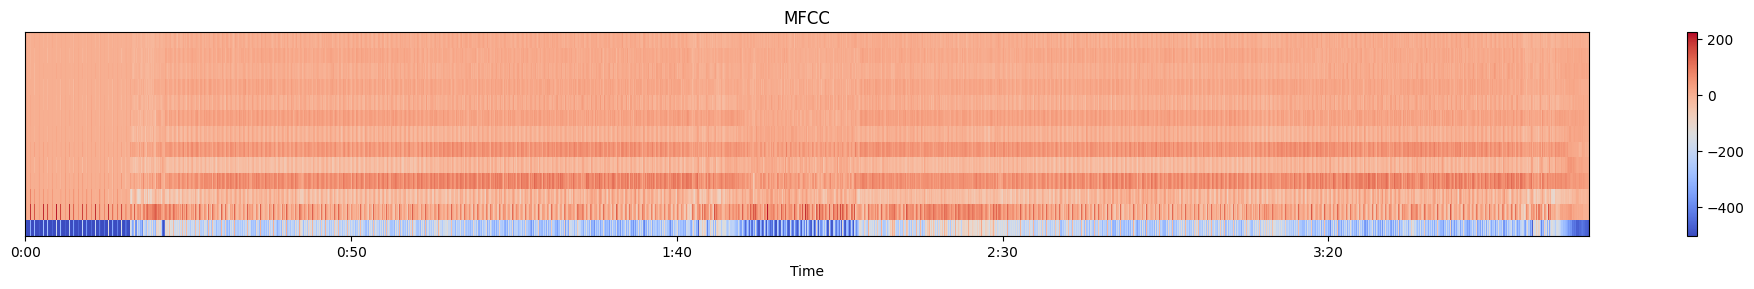

In [53]:
# 4) MFCC (Mel-Frequency Cepstral Coefficients)
plt.figure(figsize=(20, 10))
plt.subplot(4, 1, 4)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')

plt.tight_layout()
plt.show()

In [43]:
print(mfcc)

[[-5.0085370e+02 -4.9727646e+02 -4.1483627e+02 ... -4.8567929e+02
  -4.8680951e+02 -4.9610812e+02]
 [ 1.1479397e+00  5.6904140e+00  1.0368942e+02 ... -2.7927101e-01
   1.4435306e-01  1.8249545e+00]
 [ 1.0038552e+00  4.1509151e+00  6.0665161e+01 ... -6.8120098e+00
  -6.5087848e+00 -7.5565588e-01]
 ...
 [ 2.5534147e-01  8.3323544e-01 -4.4224195e+00 ...  8.8621550e+00
   1.0337738e+01  5.0675192e+00]
 [ 4.7513284e-02  9.9423897e-01 -8.9782028e+00 ...  3.6886115e+00
   5.1475325e+00  2.9078088e+00]
 [-1.8354326e-01  6.5470576e-01 -1.6848831e+01 ... -1.0565534e+00
  -2.7894392e+00  5.4014063e-01]]


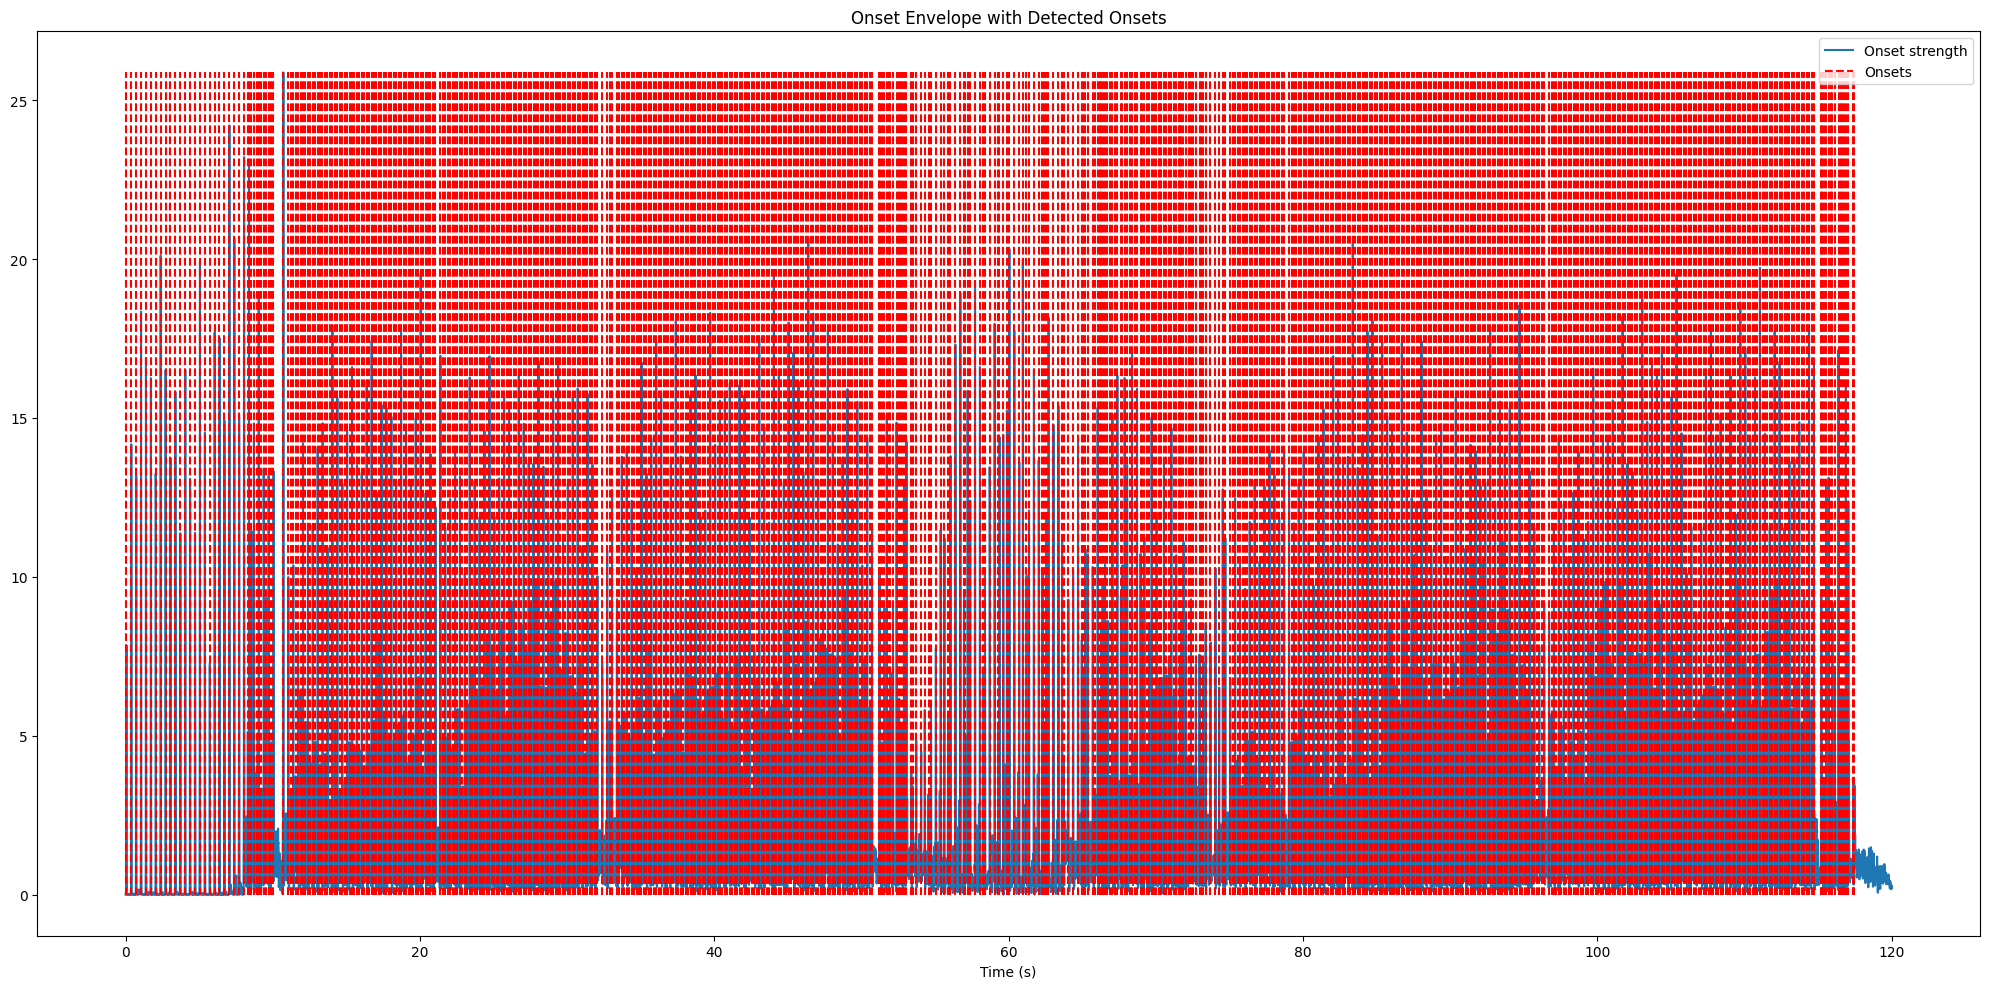

In [54]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)

plt.figure(figsize=(20, 10))
times = librosa.times_like(onset_env, sr=sr)
plt.plot(times, onset_env, label='Onset strength')
plt.vlines(librosa.frames_to_time(onset_frames, sr=sr), 0, onset_env.max(), color='r', linestyle='--', label='Onsets')
plt.legend()
plt.title('Onset Envelope with Detected Onsets')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


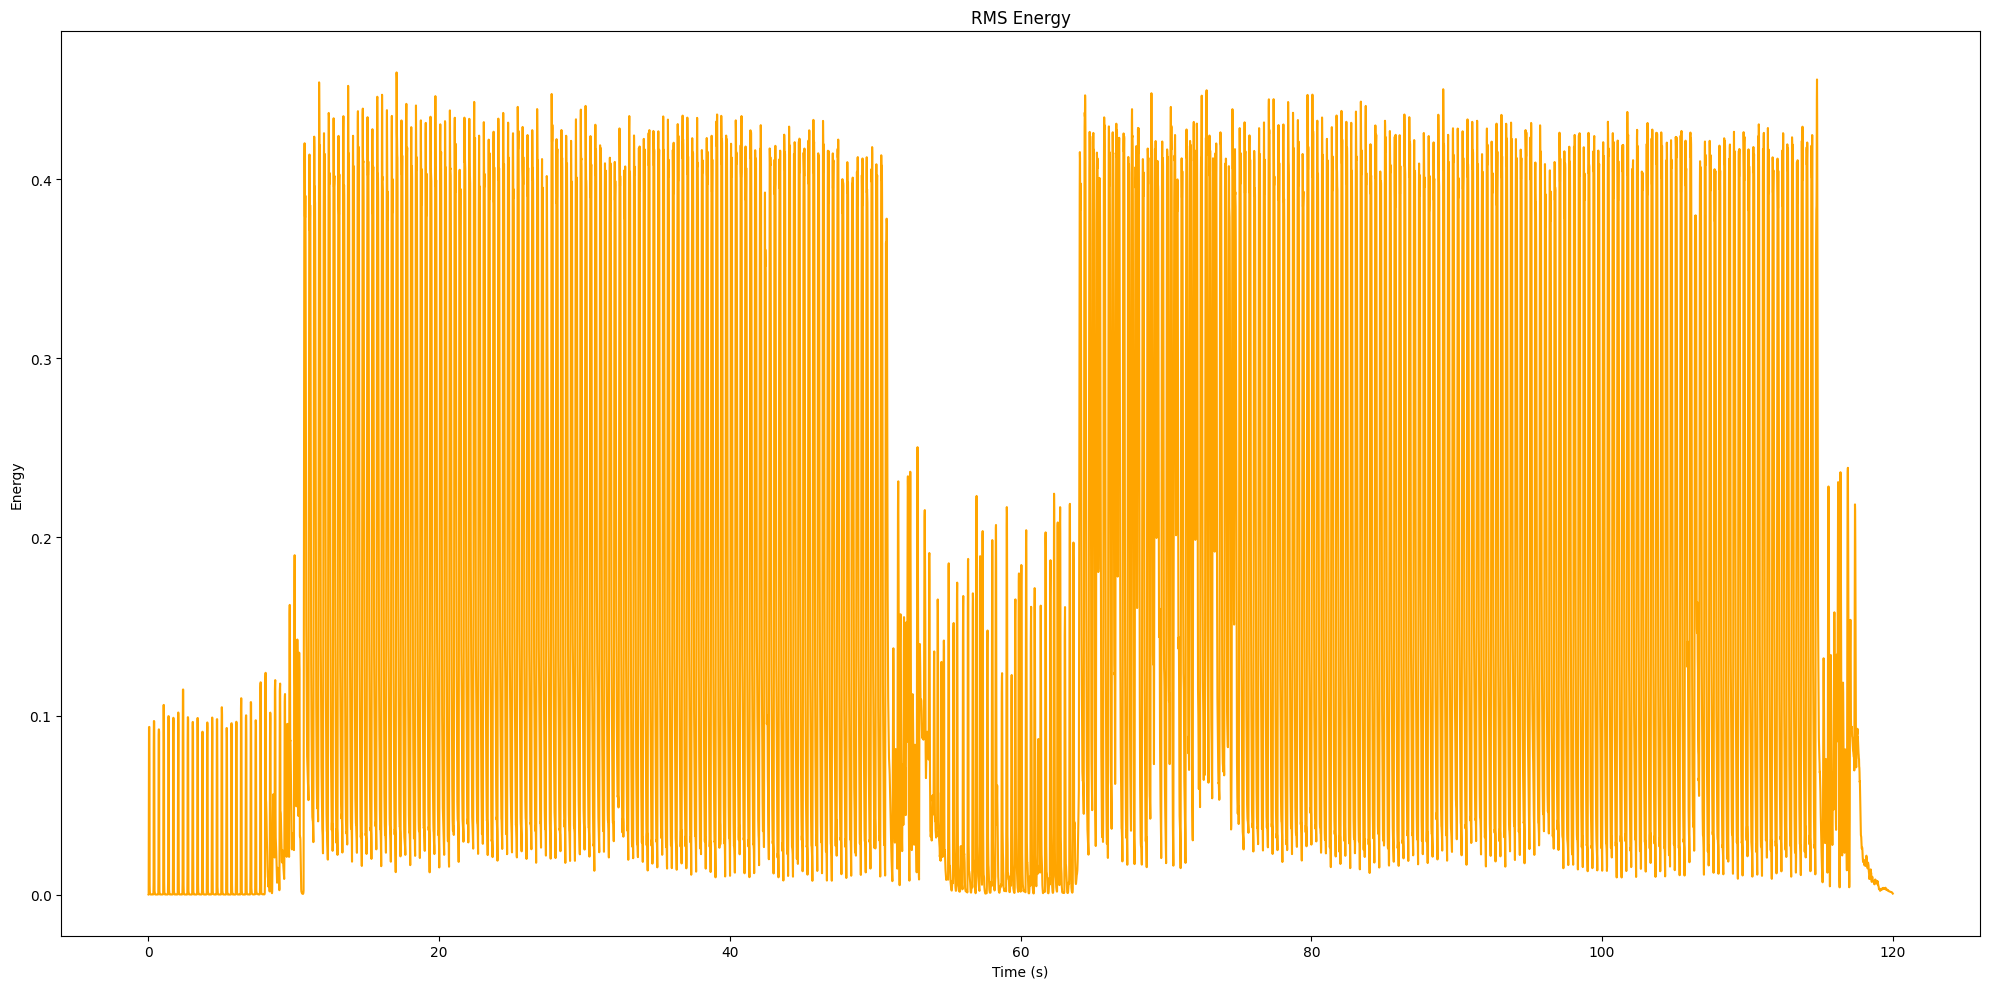

In [55]:
rms = librosa.feature.rms(y=y)[0]
frames = range(len(rms))
times = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(20, 10))
plt.plot(times, rms, label='RMS Energy', color='orange')
plt.title('RMS Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.tight_layout()
plt.show()


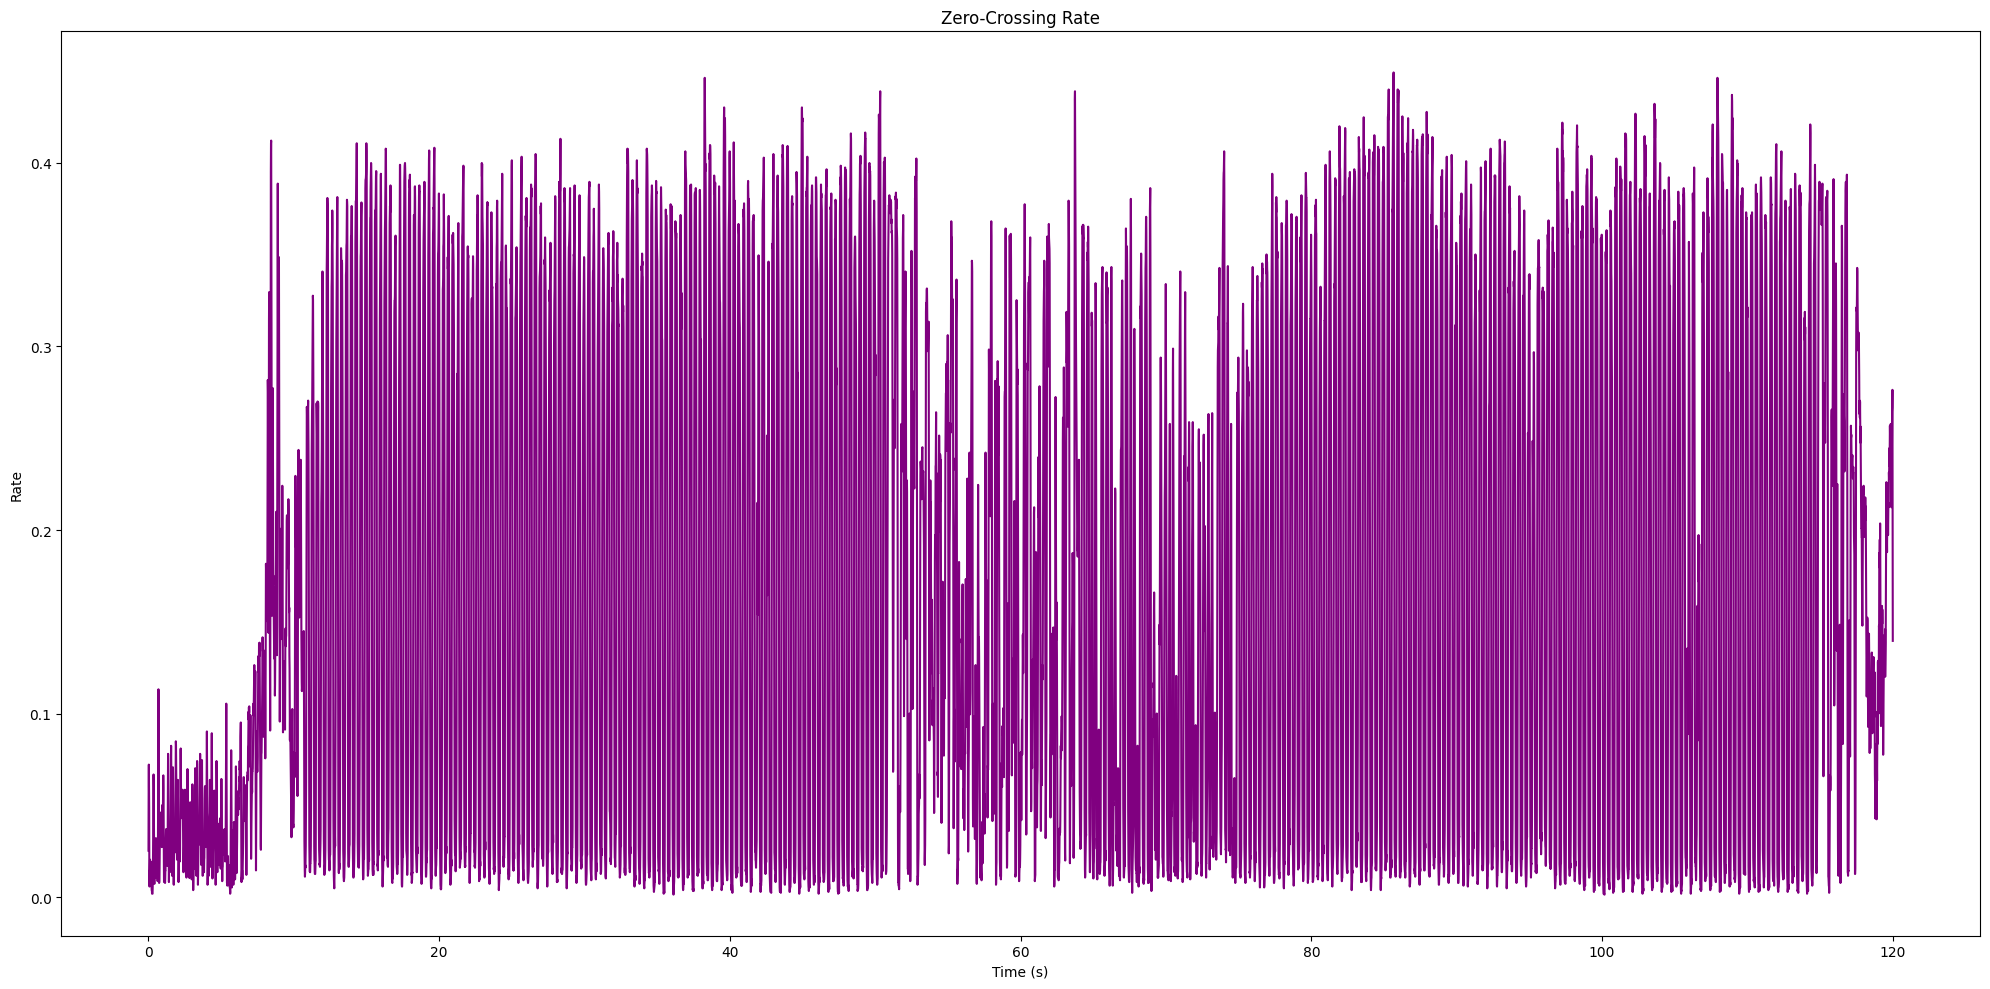

In [56]:
zcr = librosa.feature.zero_crossing_rate(y=y)[0]
times = librosa.frames_to_time(range(len(zcr)), sr=sr)

plt.figure(figsize=(20, 10))
plt.plot(times, zcr, label='Zero-Crossing Rate', color='purple')
plt.title('Zero-Crossing Rate')
plt.xlabel('Time (s)')
plt.ylabel('Rate')
plt.tight_layout()
plt.show()


Estimated Tempo: 178.21 BPM


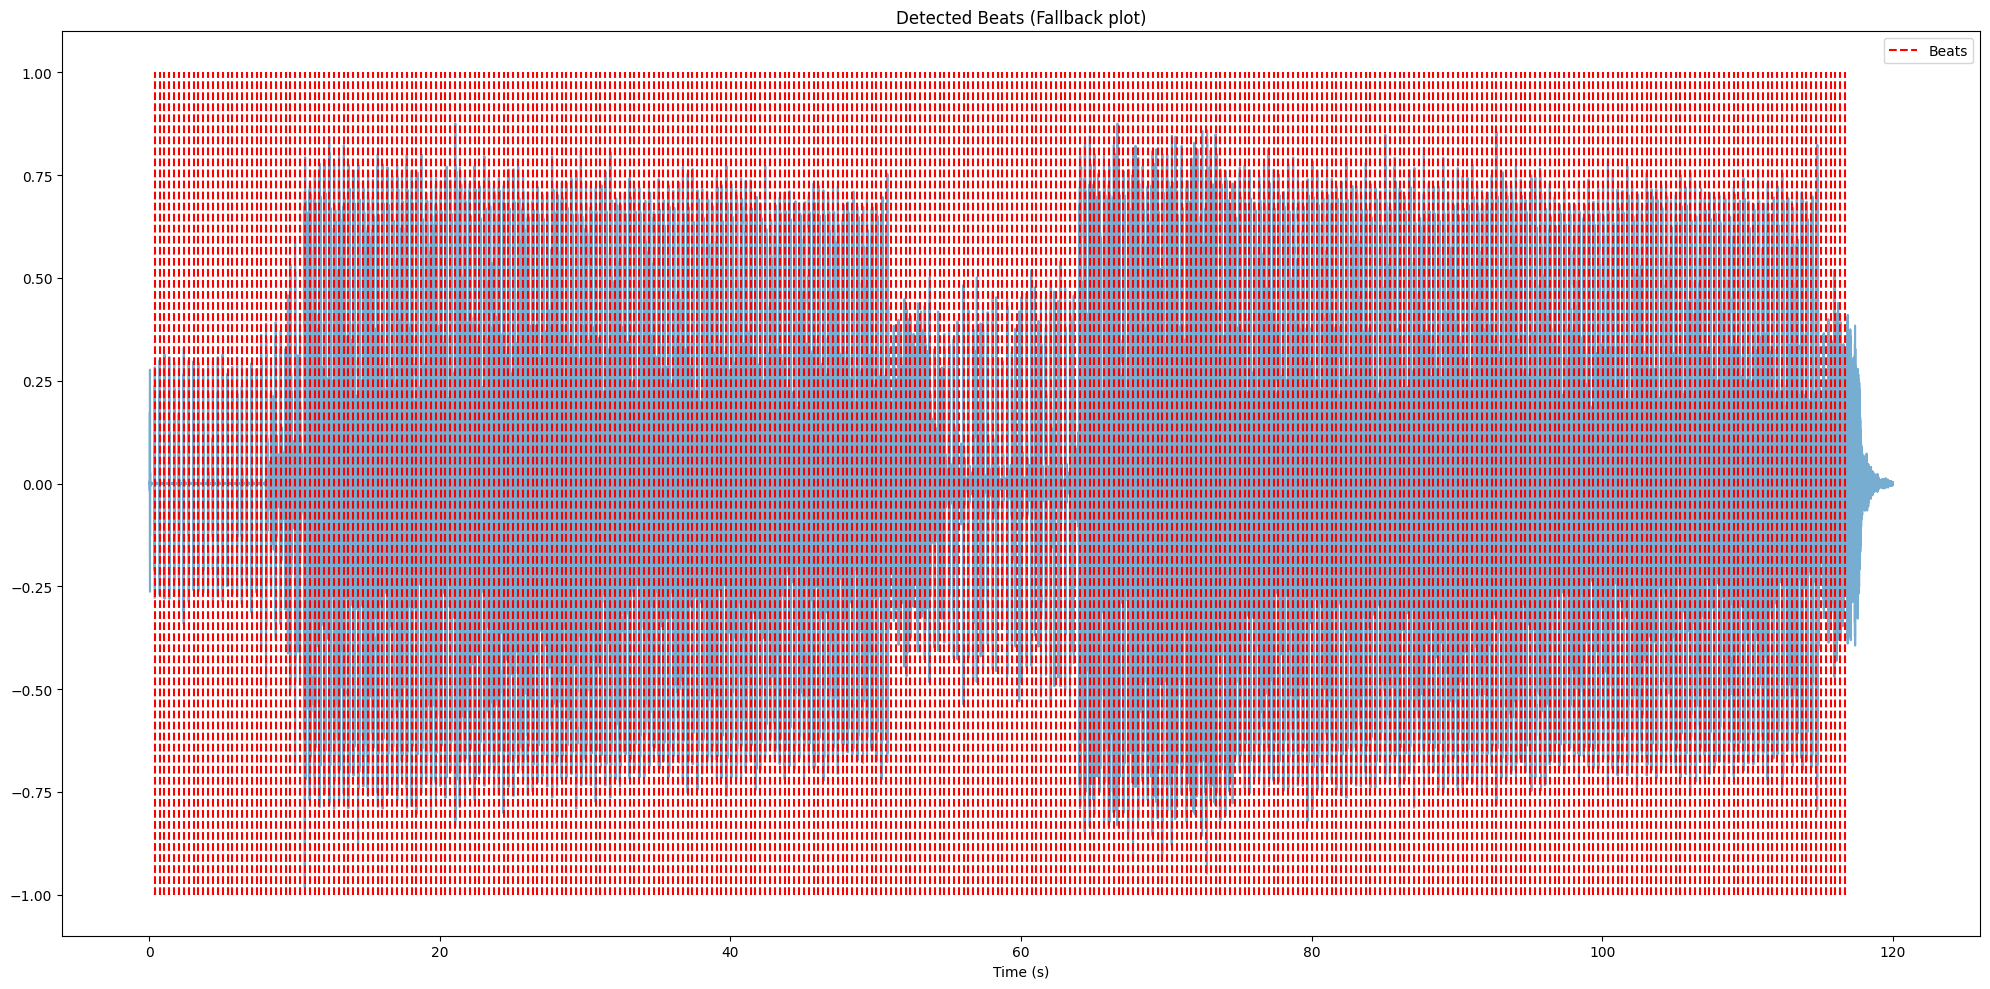

In [58]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(f"Estimated Tempo: {tempo:.2f} BPM")

# 시각화
plt.figure(figsize=(20, 10))
times = np.linspace(0, len(y) / sr, len(y))
plt.plot(times, y, alpha=0.6)
plt.vlines(librosa.frames_to_time(beats, sr=sr), -1, 1, color='r', linestyle='--', label='Beats')
plt.title('Detected Beats (Fallback plot)')
plt.xlabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.show()
